# Support Center Queue ... Stochastic Sim. Phase 2

Jill is happy that her code seems to be running well, and simulating a fixed arrival and service stream.  That is, she has a nice tool to gather stats and experiment with staffing needs for various scenarios.

Such scenarios are nice, but they are fixed in nature, and Jill understandably wants to also be sure that any recomendations she makes are robust to variability in the loads.
So she will extend her analysis in another way.  First, she wants to simulate many days, and experiment with adding staff, etc.  The first step is to generate arrivals to the support center randomly, and generate random service times --- A monte carlo simulation.  She knows from her intro to Ops class (which she loved), that one way to help validate her code is to compare it to a theoretical M/M/1 queueing system.  Once she sees her code track the theoretical values, she would feel better about making changes to the distribution, etc.  That is, she will have confidence that her code is working.   So here is her current plan for Phase 2:

- Jobs arrive to the support center with interarrival times according to an exponential distribution
- Service times are generated according to an exponential distribution
- Still just one server (for now!), and thus she will be simulating an M/M/1 queueing system

## Let's load up some common code modules before we begin

In [66]:
import math
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

## Let's load our data into Python data structures

In [67]:
# Create NUMBER_OF_ARRIVALS arrivals with interarrival times 
# Exponentially distributed with mean MEAN_TIME_BETWEEN_ARRIVALS
# And service times exponentially distributed with MEAN_SERVICE_TIME
NUMBER_OF_ARRIVALS = 100000
MEAN_TIME_BETWEEN_ARRIVALS = 200
MEAN_SERVICE_TIME = 190

DEBUG = False

job_list = []
# If you specify a seed, here 55, then the random numbers will be the same each run
#np.random.seed(55)

for i in range(NUMBER_OF_ARRIVALS):
    # create a new job object
    new_job = {}
    
    # Put the first arrival at time 0
    if (i==0):
        new_job['arrival_time'] = 0
    else:
        # note arrival_jobs[-1] returns the last job in the arrival_jobs list 
        last_arrival_time = job_list[-1]['arrival_time']
        next_arrival_time = last_arrival_time + math.ceil(np.random.exponential(MEAN_TIME_BETWEEN_ARRIVALS))
        new_job['arrival_time'] = next_arrival_time
        
    job_list.append(new_job)

# Let's inspect the first few arrival times
pprint(job_list[:20],indent=4)


[   {'arrival_time': 0},
    {'arrival_time': 12},
    {'arrival_time': 158},
    {'arrival_time': 233},
    {'arrival_time': 257},
    {'arrival_time': 435},
    {'arrival_time': 592},
    {'arrival_time': 625},
    {'arrival_time': 1008},
    {'arrival_time': 1056},
    {'arrival_time': 1337},
    {'arrival_time': 1429},
    {'arrival_time': 1579},
    {'arrival_time': 1783},
    {'arrival_time': 1824},
    {'arrival_time': 1929},
    {'arrival_time': 1946},
    {'arrival_time': 2473},
    {'arrival_time': 2484},
    {'arrival_time': 2831}]


## Let's create a few more data structures that will be useful for our simulation

In [68]:
# job_queue is a list to hold jobs that have arrived and are waiting for service
jobs_in_queue = []
# A variable that holds None or job in service
job_in_service = None
# job_completion_times is a list holding when jobs complete service
completed_jobs = []

In [69]:
def is_simulation_over():
#     return len(completed_jobs) == len(arrival_times)
    return len(completed_jobs) == NUMBER_OF_ARRIVALS
      
def is_unprocessed_job_remaining():
    return len(job_list) > 0

def next_arrival_at_time(time):
    return job_list[0]['arrival_time'] == time

def is_job_in_service():
    return job_in_service != None

def is_job_remaining_in_queue():
    return len(jobs_in_queue) > 0

def is_job_complete(time_period):
    return job_in_service["start_service_time"] + job_in_service["service_duration"] == time_period
    
def set_job_in_service_duration():
    # job_in_service["service_duration"] = service_durations.pop(0)
    job_in_service["service_duration"] = math.ceil(np.random.exponential(MEAN_SERVICE_TIME))
    
def set_job_start_service_time(time_period):
    job_in_service["start_service_time"] =  time_period
    
def set_job_in_service_completion_time(time_period):
    job_in_service["service_completion_time"] = time_period

## We will now loop through time, with a variable called  `time_period`

In [70]:
#  We will increment time_period as simulation proceeds
time_period = 0
#  We will run our simulation until all jobs have departed service
print('Begin simulation loop')
while not is_simulation_over():
    DEBUG and print('Time Period:',time_period)
    #
    # PROCESS POSSIBLE ARRIVAL TO QUEUE
    #
    if (is_unprocessed_job_remaining() and next_arrival_at_time(time_period)):
        DEBUG and print('** Process Arrival at time',time_period)
        
        # remove first job from arrival_jobs
        job_moving_to_queue = job_list.pop(0)
        # append job to end of jobs_in_queue
        jobs_in_queue.append(job_moving_to_queue)
    #
    # PROCESS POSSIBLE SERVICE COMPLETION
    #
    if (is_job_in_service() and is_job_complete(time_period)):
        DEBUG and print('** Process Departure at time',time_period)
        
        # record time of completion
        set_job_in_service_completion_time(time_period)
        
        # add job to departure_times list
        completed_jobs.append(job_in_service)
        # Free up our server
        job_in_service = None
    #
    # PROCESS POSSIBLE START OF SERVICE, DEPARTURE FROM QUEUE
    if (not is_job_in_service() and is_job_remaining_in_queue()):
        
        DEBUG and print('** Process Start of Service at time:',time_period)
        # remove first job from queue
        job_in_service = jobs_in_queue.pop(0)
        # Place in service by setting service start time and service duration
        set_job_start_service_time(time_period)
        set_job_in_service_duration()
    #
    # Increment the time_period before going back to top of loop
    time_period = time_period + 1

Begin simulation loop


In [71]:
pprint(completed_jobs[:20],indent=4)

[   {   'arrival_time': 0,
        'service_completion_time': 164,
        'service_duration': 164,
        'start_service_time': 0},
    {   'arrival_time': 12,
        'service_completion_time': 565,
        'service_duration': 401,
        'start_service_time': 164},
    {   'arrival_time': 158,
        'service_completion_time': 895,
        'service_duration': 330,
        'start_service_time': 565},
    {   'arrival_time': 233,
        'service_completion_time': 979,
        'service_duration': 84,
        'start_service_time': 895},
    {   'arrival_time': 257,
        'service_completion_time': 1219,
        'service_duration': 240,
        'start_service_time': 979},
    {   'arrival_time': 435,
        'service_completion_time': 1848,
        'service_duration': 629,
        'start_service_time': 1219},
    {   'arrival_time': 592,
        'service_completion_time': 1946,
        'service_duration': 98,
        'start_service_time': 1848},
    {   'arrival_time': 625,
       

### Let's inspect the total system time

In [72]:
system_time=[]
for job in completed_jobs:
    system_time.append(job['service_completion_time']-job['arrival_time'])
#
pprint(system_time[:20])

[164,
 553,
 737,
 746,
 962,
 1413,
 1354,
 1498,
 1947,
 1907,
 1890,
 1868,
 1820,
 1781,
 1745,
 1740,
 1774,
 1264,
 1319,
 1276]


In [73]:
print('The average system time is:',np.mean(system_time))

The average system time is: 3299.79406


### Compare to M/M/1 theoretical average time in system
- $CT = \frac{1}{\mu - \lambda}$
- Here, $\mu$ is the average service rate, 1/MEAN_SERVICE_TIME
- And $\lambda$ is the average arrival rate, 1/MEAN_TIME_BETWEEN_ARRIVALS

In [74]:
print('The theoretical average system time is:',1/( (1/MEAN_SERVICE_TIME) - (1/MEAN_TIME_BETWEEN_ARRIVALS) ))

The theoretical average system time is: 3800.000000000003


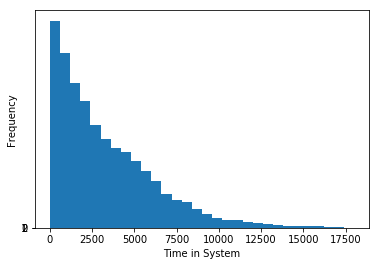

In [75]:
# Tinker with number of bins, until it looks right
plt.hist(system_time,bins=30)
# you can customize the exact tick marks on an axis
plt.yticks(range(0,3))
plt.ylabel('Frequency');
plt.xlabel('Time in System');

## The NumPy package provides lots of statistical methods, we call it with `np`

In [76]:
np.max(system_time)

18003

In [77]:
# 50th percentile, or median
np.percentile(system_time,50)

2499.0

In [78]:
np.median(system_time)

2499.0

In [79]:
np.std(system_time)

2893.195845636572

# Homework/In-class work

Consider the following function that will return an exponential random variable that takes one argument, the mean:

    
```
 def exponential(mean):
 # using math.ceil will round up all floating point numbers
 return math.ceil(np.random.exponential(mean))
```
        
So, to get an exponential random variable with mean 10, we would use: `exponential(10)`

1. Incorporate this function into the code and use it to for arrivals and service times
    
1. Of course, we may want to use other distributions in a simulation.  Write functions for other distributions,  `normal`, `triangular`,  and `uniform`, explore the `numpy` documentation:  https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

   - remember, make sure your functions return only positive integers for our purposes.
   - try out each of your functions in some cells to make sure they work as expected

   
